In [21]:
import os
import optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor

os.chdir('C:\\Users\\manon\\OneDrive\\Documents\\OpenClassrooms\\Projet8')

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [3]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

### D'après "Comparison Between 5 Regression Algorithm", les forêts aléatoires semblent particulièrement indiquées pour ces données. C'est donc le modèle sur lequel nous nous pencherons.

In [25]:
def objective(trial, train, test):
    X_train = train.drop(columns=["SalePrice"])
    y_train = train.SalePrice
    X_test = test.drop(columns=["SalePrice"])
    y_test = test.SalePrice

    rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    regressor_obj = RandomForestRegressor(
        max_depth=rf_max_depth, n_estimators=rf_n_estimators)

    regressor_obj.fit(X_train, y_train)

    preds = regressor_obj.predict(X_test)

    rmse_score = sklearn.metrics.mean_squared_error(y_test, preds, squared=False)
    return rmse_score
    

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, train, test), n_trials=100)

trial = study.best_trial

print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-19 04:04:03,967] A new study created in memory with name: no-name-5393dde6-82d4-4b91-8136-c84afa2f1f0c
[I 2021-06-19 04:04:08,248] Trial 0 finished with value: 0.1584628615717674 and parameters: {'rf_n_estimators': 426, 'rf_max_depth': 7}. Best is trial 0 with value: 0.1584628615717674.
[I 2021-06-19 04:04:17,342] Trial 1 finished with value: 0.1531043242183811 and parameters: {'rf_n_estimators': 532, 'rf_max_depth': 30}. Best is trial 1 with value: 0.1531043242183811.
[I 2021-06-19 04:04:17,498] Trial 2 finished with value: 0.16707145930732542 and parameters: {'rf_n_estimators': 10, 'rf_max_depth': 9}. Best is trial 1 with value: 0.1531043242183811.
[I 2021-06-19 04:04:18,018] Trial 3 finished with value: 0.15626877405122586 and parameters: {'rf_n_estimators': 23, 'rf_max_depth': 22}. Best is trial 1 with value: 0.1531043242183811.
[I 2021-06-19 04:04:23,497] Trial 4 finished with value: 0.15304407565062733 and parameters: {'rf_n_estimators': 387, 'rf_max_depth': 10}. Best 

[I 2021-06-19 04:11:45,717] Trial 40 finished with value: 0.15386599619918487 and parameters: {'rf_n_estimators': 292, 'rf_max_depth': 19}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:12:02,183] Trial 41 finished with value: 0.1533726338581049 and parameters: {'rf_n_estimators': 820, 'rf_max_depth': 32}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:12:19,511] Trial 42 finished with value: 0.15243899350943615 and parameters: {'rf_n_estimators': 942, 'rf_max_depth': 32}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:12:36,962] Trial 43 finished with value: 0.15313489925347598 and parameters: {'rf_n_estimators': 998, 'rf_max_depth': 29}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:12:55,655] Trial 44 finished with value: 0.15300424012769312 and parameters: {'rf_n_estimators': 953, 'rf_max_depth': 23}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:13:05,706] Trial 45 finished with 

[I 2021-06-19 04:19:02,314] Trial 81 finished with value: 0.15215909084211662 and parameters: {'rf_n_estimators': 523, 'rf_max_depth': 21}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:19:08,347] Trial 82 finished with value: 0.15247576069947322 and parameters: {'rf_n_estimators': 516, 'rf_max_depth': 17}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:19:14,321] Trial 83 finished with value: 0.1529582347261376 and parameters: {'rf_n_estimators': 518, 'rf_max_depth': 14}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:19:21,694] Trial 84 finished with value: 0.15231412200645092 and parameters: {'rf_n_estimators': 544, 'rf_max_depth': 17}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:19:28,370] Trial 85 finished with value: 0.15361165435410612 and parameters: {'rf_n_estimators': 534, 'rf_max_depth': 17}. Best is trial 14 with value: 0.15206470414484516.
[I 2021-06-19 04:19:34,468] Trial 86 finished with 

RMSE: 0.15206470414484516
Best hyperparameters: {'rf_n_estimators': 777, 'rf_max_depth': 32}


In [27]:
X_train = train.drop(columns=["SalePrice"])
y_train = train.SalePrice
X_test = test.drop(columns=["SalePrice"])
y_test = test.SalePrice

In [28]:
rf = RandomForestRegressor(max_depth=32, n_estimators=77)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=32, n_estimators=77)

In [29]:
p = rf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, p, squared=False)

0.15263115158804713

In [34]:
imp_df = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)),
                      columns=["Feature", "Importance"])

Text(0.5, 1.0, 'Variables les plus importantes')

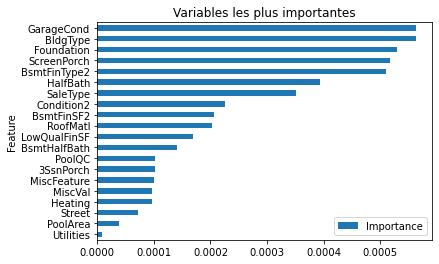

In [35]:
imp_df.sort_values("Importance").set_index("Feature")[0:20].plot(kind="barh")
plt.title("Variables les plus importantes")

In [36]:
newdata = pd.read_csv('newdata_transforme.csv', index_col=0)
newdata['SalePrice'] = rf.predict(newdata)

In [122]:
submission = pd.DataFrame(newdata["SalePrice"])
submission = np.exp(submission)
submission.to_csv("submission.csv")

In [26]:
def objective(trial, train, test):
    X_train = train.drop(columns=["SalePrice"])
    y_train = train.SalePrice
    X_test = test.drop(columns=["SalePrice"])
    y_test = test.SalePrice

    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    rf_max_features = trial.suggest_categorical("max_features", ["auto", "sqrt"])
    rf_min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    rf_min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
    rf_bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    regressor_obj = RandomForestRegressor(
        max_depth=rf_max_depth, n_estimators=1000, max_features=rf_max_features,
        min_samples_split=rf_min_samples_split, min_samples_leaf=rf_min_samples_leaf,
        bootstrap=rf_bootstrap)

    regressor_obj.fit(X_train, y_train)

    preds = regressor_obj.predict(X_test)

    rmse_score = sklearn.metrics.mean_squared_error(y_test, preds, squared=False)
    return rmse_score
    

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, train, test), n_trials=100)

trial = study.best_trial

print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-19 04:20:52,268] A new study created in memory with name: no-name-74715467-b63d-4a30-a139-5a85dd330adf
[I 2021-06-19 04:20:55,861] Trial 0 finished with value: 0.20372640895940927 and parameters: {'rf_max_depth': 3, 'max_features': 'auto', 'min_samples_split': 10, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 0 with value: 0.20372640895940927.
[I 2021-06-19 04:20:57,148] Trial 1 finished with value: 0.21392013933715034 and parameters: {'rf_max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.20372640895940927.
[I 2021-06-19 04:21:10,276] Trial 2 finished with value: 0.20574970437400789 and parameters: {'rf_max_depth': 11, 'max_features': 'auto', 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.20372640895940927.
[I 2021-06-19 04:21:12,272] Trial 3 finished with value: 0.1613613562620423 and parameters: {'rf_max_depth': 23, 'max_featur

[I 2021-06-19 04:22:34,180] Trial 31 finished with value: 0.15243335023372862 and parameters: {'rf_max_depth': 32, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 21 with value: 0.1517577410822472.
[I 2021-06-19 04:22:36,622] Trial 32 finished with value: 0.1541026967863258 and parameters: {'rf_max_depth': 26, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 21 with value: 0.1517577410822472.
[I 2021-06-19 04:22:39,276] Trial 33 finished with value: 0.15199818342431376 and parameters: {'rf_max_depth': 27, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': False}. Best is trial 21 with value: 0.1517577410822472.
[I 2021-06-19 04:22:40,333] Trial 34 finished with value: 0.24508762253436747 and parameters: {'rf_max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 5, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 21 with value

[I 2021-06-19 04:24:31,808] Trial 62 finished with value: 0.14923065092342253 and parameters: {'rf_max_depth': 14, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 56 with value: 0.1490386094384156.
[I 2021-06-19 04:24:34,755] Trial 63 finished with value: 0.1491172193647221 and parameters: {'rf_max_depth': 14, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 56 with value: 0.1490386094384156.
[I 2021-06-19 04:24:36,908] Trial 64 finished with value: 0.15786022383050038 and parameters: {'rf_max_depth': 19, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 56 with value: 0.1490386094384156.
[I 2021-06-19 04:24:39,756] Trial 65 finished with value: 0.1494250124899512 and parameters: {'rf_max_depth': 13, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 56 with value

[I 2021-06-19 04:26:20,452] Trial 93 finished with value: 0.14892485597454916 and parameters: {'rf_max_depth': 25, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 85 with value: 0.14834759643956466.
[I 2021-06-19 04:26:24,084] Trial 94 finished with value: 0.14866740466286266 and parameters: {'rf_max_depth': 23, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 85 with value: 0.14834759643956466.
[I 2021-06-19 04:26:27,522] Trial 95 finished with value: 0.1494303207012843 and parameters: {'rf_max_depth': 22, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 85 with value: 0.14834759643956466.
[I 2021-06-19 04:26:30,947] Trial 96 finished with value: 0.14819845780177682 and parameters: {'rf_max_depth': 29, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 96 with v

RMSE: 0.14819845780177682
Best hyperparameters: {'rf_max_depth': 29, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}


In [68]:
rf = RandomForestRegressor(max_depth=29, max_features='sqrt',
                           min_samples_split=2, min_samples_leaf=1,
                           bootstrap=False)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=29, max_features='sqrt')

In [39]:
p = rf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, p, squared=False)

0.15163728652655092

In [40]:
imp_df = pd.DataFrame(list(zip(X_train.columns, rf.feature_importances_)),
                      columns=["Feature", "Importance"])

Text(0.5, 1.0, 'Variables les plus importantes')

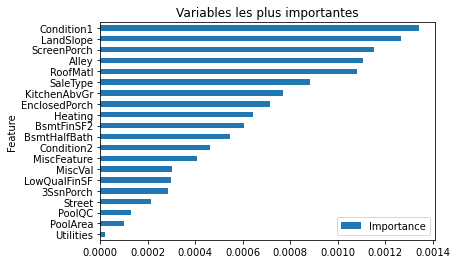

In [41]:
imp_df.sort_values("Importance").set_index("Feature")[0:20].plot(kind="barh")
plt.title("Variables les plus importantes")

In [69]:
newdata = pd.read_csv('newdata_transforme.csv', index_col=0)
newdata['SalePrice'] = rf.predict(newdata)

In [167]:
submission = pd.DataFrame(newdata["SalePrice"])
submission = np.exp(submission)
submission.to_csv("submission2.csv")

In [70]:
0.14345/newdata['SalePrice'].mean()

0.011944278084837442

### Nouveau test : sélectionnons manuellement une partie seulement des variables, qui semblent être particulièrement importantes d'après l'analyse

In [50]:
imp_vars = ["OverallQual", "YearBuilt", "YearRemodAdd", "BsmtFinSF1",
            "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea",
            "TotRmsAbvGrd", "Fireplaces", "GarageArea", "WoodDeckSF",
            "MSZoning", "Alley", "Neighborhood", "Condition1", "Condition2",
            "HouseStyle", "MasVnrType", "ExterQual", "Foundation", "BsmtQual",
            "CentralAir", "KitchenQual", "GarageQual", "PoolQC", "SaleType",
            "SalePrice"]

In [51]:
train2 = train[imp_vars]
test2 = test[imp_vars]

In [52]:
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, train2, test2), n_trials=100)

trial = study.best_trial

print('RMSE: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-06-19 09:57:05,082] A new study created in memory with name: no-name-23278fd0-5a6a-4e11-a392-46ec24ae100a
[I 2021-06-19 09:57:06,813] Trial 0 finished with value: 0.16108763493824288 and parameters: {'rf_max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 4, 'min_samples_leaf': 5, 'bootstrap': True}. Best is trial 0 with value: 0.16108763493824288.
[I 2021-06-19 09:57:12,799] Trial 1 finished with value: 0.202923744114055 and parameters: {'rf_max_depth': 9, 'max_features': 'auto', 'min_samples_split': 4, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.16108763493824288.
[I 2021-06-19 09:57:14,625] Trial 2 finished with value: 0.15144949319290626 and parameters: {'rf_max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 2 with value: 0.15144949319290626.
[I 2021-06-19 09:57:16,235] Trial 3 finished with value: 0.16078768005649888 and parameters: {'rf_max_depth': 7, 'max_features

[I 2021-06-19 09:58:22,177] Trial 31 finished with value: 0.148904115607055 and parameters: {'rf_max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 7, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 18 with value: 0.14868436158319348.
[I 2021-06-19 09:58:24,349] Trial 32 finished with value: 0.14947264602329352 and parameters: {'rf_max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 18 with value: 0.14868436158319348.
[I 2021-06-19 09:58:26,603] Trial 33 finished with value: 0.14859646235756113 and parameters: {'rf_max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 33 with value: 0.14859646235756113.
[I 2021-06-19 09:58:28,501] Trial 34 finished with value: 0.1497551430065386 and parameters: {'rf_max_depth': 9, 'max_features': 'sqrt', 'min_samples_split': 6, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 33 with valu

[I 2021-06-19 09:59:45,068] Trial 62 finished with value: 0.14793890883666375 and parameters: {'rf_max_depth': 26, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 47 with value: 0.1469472391010598.
[I 2021-06-19 09:59:48,080] Trial 63 finished with value: 0.1471131269208083 and parameters: {'rf_max_depth': 27, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 47 with value: 0.1469472391010598.
[I 2021-06-19 09:59:51,163] Trial 64 finished with value: 0.14780214663098795 and parameters: {'rf_max_depth': 27, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 47 with value: 0.1469472391010598.
[I 2021-06-19 09:59:54,197] Trial 65 finished with value: 0.14705344518438307 and parameters: {'rf_max_depth': 29, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 47 with valu

[I 2021-06-19 10:01:18,037] Trial 93 finished with value: 0.14739279303085445 and parameters: {'rf_max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 47 with value: 0.1469472391010598.
[I 2021-06-19 10:01:21,136] Trial 94 finished with value: 0.14675833743609437 and parameters: {'rf_max_depth': 18, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 94 with value: 0.14675833743609437.
[I 2021-06-19 10:01:24,192] Trial 95 finished with value: 0.14725592808662388 and parameters: {'rf_max_depth': 18, 'max_features': 'sqrt', 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 94 with value: 0.14675833743609437.
[I 2021-06-19 10:01:26,940] Trial 96 finished with value: 0.1471267139311256 and parameters: {'rf_max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 94 with va

RMSE: 0.1465067408349971
Best hyperparameters: {'rf_max_depth': 16, 'max_features': 'sqrt', 'min_samples_split': 3, 'min_samples_leaf': 1, 'bootstrap': False}


In [53]:
X_train2 = train2.drop(columns=["SalePrice"])
X_test2 = test2.drop(columns=["SalePrice"])

In [54]:
rf = RandomForestRegressor(max_depth=16, max_features='sqrt',
                           min_samples_split=3, min_samples_leaf=1,
                           bootstrap=False)
rf.fit(X_train2, y_train)

RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=3)

In [56]:
p = rf.predict(X_test2)
sklearn.metrics.mean_squared_error(y_test, p, squared=False)

0.1496956433707586

In [58]:
imp_df = pd.DataFrame(list(zip(X_train2.columns, rf.feature_importances_)),
                      columns=["Feature", "Importance"])

Text(0.5, 1.0, 'Variables les plus importantes')

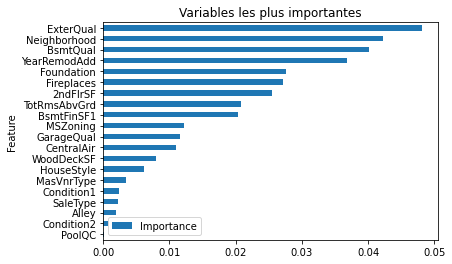

In [59]:
imp_df.sort_values("Importance").set_index("Feature")[0:20].plot(kind="barh")
plt.title("Variables les plus importantes")

In [64]:
imp_vars.remove("SalePrice")

In [65]:
newdata = pd.read_csv('newdata_transforme.csv', index_col=0)
newdata['SalePrice'] = rf.predict(newdata[imp_vars])

In [66]:
submission = pd.DataFrame(newdata["SalePrice"])
submission = np.exp(submission)
submission.to_csv("submission3.csv")

In [67]:
0.14324/newdata['SalePrice'].mean()

0.011931100510750579